In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('../Data/selected_data/merged_data.csv')

C:\Users\kauad\AppData\Local\Temp\ipykernel_3396\4150934281.py:6: DtypeWarning: Columns (30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../Data/selected_data/merged_data.csv')


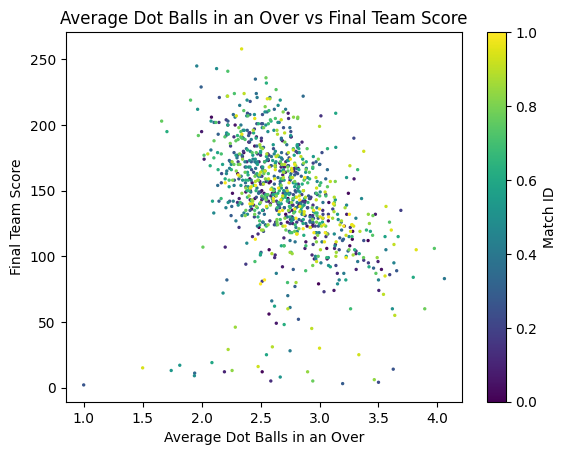

In [31]:
# Calculate the average number of dot balls in an over of a match
dot_balls = data[data['runs_by_bat'] == 0]
dot_balls = dot_balls.groupby(['match_id', 'innings', 'over']).size().reset_index(name='dot_balls')
dot_balls = dot_balls.groupby(['match_id', 'innings']).mean().reset_index()
dot_balls = dot_balls.groupby('match_id').mean().reset_index()
dot_balls = dot_balls.rename(columns={'dot_balls': 'avg_dot_balls'})

# Calculate the final team score
final_team_score = data.groupby('match_id').last().reset_index()
final_team_score = final_team_score[['match_id', 'final_team_total']]
final_team_score = final_team_score.rename(columns={'final_team_total': 'team_score'})

num_matches = len(dot_balls['match_id'].unique())
colors = plt.cm.viridis(np.linspace(0, 1, num_matches))

# Plot average dot balls in an over of a match vs final score
plt.scatter(dot_balls['avg_dot_balls'], final_team_score['team_score'], c=dot_balls['match_id'].map(dict(zip(dot_balls['match_id'].unique(), colors))), s=2)
plt.xlabel('Average Dot Balls in an Over')
plt.ylabel('Final Team Score')
plt.title('Average Dot Balls in an Over vs Final Team Score')
plt.colorbar(label='Match ID')
plt.show()